**Import stored data**

In [5]:
from datetime import datetime
from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import pandas
import matplotlib
import seaborn
import googlemaps
from datetime import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops
import time

import dill

dfGrid = dill.load(open('jupyterdills/dfGrid.dill', 'rb'))
aRoute = dill.load(open('jupyterdills/aRoute.dill', 'rb'))
dfDest = dill.load(open('jupyterdills/dfDest.dill', 'rb'))
gmDir_jobjob = dill.load(open('jupyterdills/gmDir_jobjob.dill', 'rb'))


In [12]:

from datetime import datetime
from matplotlib.path import Path
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import cartopy
import cartopy.crs as ccrs
from cartopy.io.img_tiles import OSM
import pandas
import matplotlib
import seaborn
import googlemaps
from datetime import datetime
from scipy.spatial import Voronoi, voronoi_plot_2d
import shapely.geometry
import shapely.ops
import time

import dill


#start with set of polygons
dfGrid = dill.load(open('jupyterdills/dfGrid.dill', 'rb'))
aRoute = dill.load(open('jupyterdills/aRoute.dill', 'rb'))
dfDest = dill.load(open('jupyterdills/dfDest.dill', 'rb'))
gmDir_jobjob = dill.load(open('jupyterdills/gmDir_jobjob.dill', 'rb'))




import pandas
import urllib3
import re
import json



#import BeautifulSoup4
# or if you're using BeautifulSoup4:
from bs4 import BeautifulSoup


#############For initial polygon:############

#build URL

#Define extent of lat/lon of polygon

i=0

#dfGrid.loc[i,(0,'Vertices')][:,0] #all rows, column 0 (lon)
#dfGrid.loc[i,(0,'Vertices')][:,1] #all rows, column 1 (lat)

fLonMin=dfGrid.loc[i,(0,'Vertices')][:,0].min() #all rows, column 0 (lon)
fLatMin=dfGrid.loc[i,(0,'Vertices')][:,1].min() #all rows, column 1 (lat)

fLonMax=dfGrid.loc[i,(0,'Vertices')][:,0].max() #all rows, column 0 (lon)
fLatMax=dfGrid.loc[i,(0,'Vertices')][:,1].max() #all rows, column 1 (lat)

#https://www.trulia.com/for_sale/39.411985291417,39.807143735765,-75.953610541551,-75.750363471238_xy/
# https://www.trulia.com/for_sale/fLatMin,fLatmax,fLonMin,fLonMax_xy/

iPageNo=1

#valid url:
print('https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatMax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPageNo)+'_p/')

sURL='https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatMax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPageNo)+'_p/'



#####pull data
http = urllib3.PoolManager()
r = http.request('GET', sURL)
markup=r.data


#pagedata to find number of pages
#check number of results
soup = BeautifulSoup(markup, "lxml")
test=soup.find_all(class_=re.compile(r'h6 typeLowlight pbs'))
iTotalResults=int(test[0].string.split()[0])


if iTotalResults>30:
    #only works if >30 results, find number of pages
    test=soup.find_all(class_=re.compile(r'pvl phm'))
    iTotalPages=int(test[-2].string) #second to last element in list of pages, extract string as final page #
else:
    iTotalPages=1


https://www.trulia.com/for_sale/38.6910851642,40.2300566762,-77.6082688687,-76.4524635572_xy/1_p/


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [7]:


#pagedata to find number of pages
#check number of results
soup = BeautifulSoup(markup, "lxml")
test=soup.find_all(class_=re.compile(r'h6 typeLowlight pbs'))
iTotalResults=int(test[0].string.split()[0])


if iTotalResults>30:
    #only works if >30 results
    test=soup.find_all(class_=re.compile(r'pvl phm'))
    iTotalPages=int(test[-2].string) #second to last element in list of pages, extract string as final page #
else:
    iTotalPages=1
    

print('total pages: ', iTotalPages)
print('total results: ', iTotalResults)


#Take and store additinal data
#print(re.search(r"DDC\.dataLayer\['vehicles'\]\s*=\s*(.*);", r.data.decode() ,re.DOTALL))#use DOTALL to match newlines
reJSONsearch1=re.search(r"\"cards\":\[(.*?)\],\"currentUrl", r.data.decode(), re.DOTALL)


#append brackets to read into json
dfJson1=pandas.DataFrame(json.loads('['+reJSONsearch1.group(1)+']'))


In [9]:
#put in loop to iterate over pages
#limit number for time
iTotalPages=3

#set empty dataframe
dfTempHousing=pandas.DataFrame()  
for iPage in range(iTotalPages):
    print('page:',iPage+1)
    
    #build URL
    sURL='https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatmax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPage+1)+'_p/'

    #read data
    http = urllib3.PoolManager()
    r = http.request('GET', sURL)
    
    
    #select data of interest
    reJSONsearch1=re.search(r"\"cards\":\[(.*?)\],\"currentUrl", r.data.decode(), re.DOTALL)
    #append brackets to read into json & append dataframe
    dfTempHousing=dfTempHousing.append(pandas.DataFrame(json.loads('['+reJSONsearch1.group(1)+']')))

dfTempHousing.reset_index(inplace=True)


page: 1


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


page: 2


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


page: 3


C:\Anaconda\lib\site-packages\urllib3\connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


**Next Steps**
 
* intersect with polygon
* add metrics to dfGrid
* add to full housing dataframe for later




In [10]:
##intersect with polygon

#specify polygon
GridPolygon=dfGrid.loc[i,(0,'Shape')]
#prep Polygon
PrepGridPolygon = shapely.prepared.prep(GridPolygon)


#Create array of housing points: need lon,lat format
dfTempHousing[['lat','lon']]=pandas.DataFrame(dfTempHousing.loc[:,'latLng'].values.tolist(), index= dfTempHousing.index)
testpoints=shapely.geometry.MultiPoint(np.array(dfTempHousing.loc[:,['lon','lat']]))

#specify which points fit in poly
hits = map(PrepGridPolygon.contains, testpoints)
dfTempHousing.loc[:,'InPoly']=list(hits)

In [14]:
#drop false, keep true
dfTempHousing=(dfTempHousing.loc[(dfTempHousing.loc[:,'InPoly']==True),:])

#fix values to floats
dfTempHousing.loc[:,'price']=pandas.to_numeric(dfTempHousing.loc[:,'price'].replace({'\$': '', ',': ''}, regex=True))
dfTempHousing.loc[:,'sqft']=pandas.to_numeric(dfTempHousing.loc[:,'sqft'].replace({' sqft': '', ',': ''}, regex=True))
len(dfTempHousing)

#compute basic stats
dfGrid.loc[i,(0,'MedianCost')]=dfTempHousing.loc[:,'price'].median()
dfGrid.loc[i,(0,'Count')]=len(dfTempHousing)

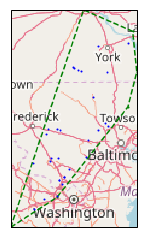

In [15]:
##############plotting to test housing filtering
aExtent=[
        fLonMin,
        fLonMax,
        fLatMin,
        fLatMax,
        ]

imagery = OSM() # Use Open street maps data
ax = plt.axes(projection=imagery.crs)
#ax.set_extent([-78, -74, 38, 41], ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)
ax.set_extent(aExtent, ccrs.Geodetic()) #longitude, latitude (x1,x2,y1,y2)

# Add the imagery to the map. Later iterations will need to intellegently determine zoom level
ax.add_image(imagery, 7) #good

#plots region of interest
x,y = GridPolygon.exterior.xy
ax.plot(
        x, #x lng
        y, #y lat
         marker='o', linestyle='--', color='green', markersize=1, transform=ccrs.Geodetic()
         )   
    
#plots housing points 
ax.plot(
        dfTempHousing.loc[:,'lon'], #x lng
        dfTempHousing.loc[:,'lat'], #y lat
         marker='o', linestyle='', color='blue', markersize=1, transform=ccrs.Geodetic()
         )   

In [ ]:
#All in a for loop:


#setup blank housing dataframe
dfHousing=pandas.DataFrame()

for i in range(len(dfGrid)):
    print('polygon: ',i)
    #Define extent of lat/lon of polygon
    
    fLonMin=dfGrid.loc[i,(0,'Vertices')][:,0].min() #all rows, column 0 (lon)
    fLatMin=dfGrid.loc[i,(0,'Vertices')][:,1].min() #all rows, column 1 (lat)
    
    fLonMax=dfGrid.loc[i,(0,'Vertices')][:,0].max() #all rows, column 0 (lon)
    fLatMax=dfGrid.loc[i,(0,'Vertices')][:,1].max() #all rows, column 1 (lat)
    
    #https://www.trulia.com/for_sale/39.411985291417,39.807143735765,-75.953610541551,-75.750363471238_xy/
    # https://www.trulia.com/for_sale/fLatMin,fLatmax,fLonMin,fLonMax_xy/
    
    
    
    #start with first page
    iPageNo=1
    
    #valid url:
    print('https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatMax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPageNo)+'_p/')
    
    sURL='https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatMax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPageNo)+'_p/'
    
    
    
    #####pull data
    http = urllib3.PoolManager()
    r = http.request('GET', sURL)
    markup=r.data
    
    
    
    
    
    #pagedata to find number of pages
    #check number of results
    soup = BeautifulSoup(markup, "lxml")
    test=soup.find_all(class_=re.compile(r'h6 typeLowlight pbs'))
    iTotalResults=int(test[0].string.split()[0])
    
    
    if iTotalResults>30:
        #only works if >30 results
        test=soup.find_all(class_=re.compile(r'pvl phm'))
        iTotalPages=int(test[-2].string) #second to last element in list of pages, extract string as final page #
    else:
        iTotalPages=1
    
    
    print('total pages: ', iTotalPages)
    print('total results: ', iTotalResults)
    
    
    #Take and store additinal data
    #print(re.search(r"DDC\.dataLayer\['vehicles'\]\s*=\s*(.*);", r.data.decode() ,re.DOTALL))#use DOTALL to match newlines
    reJSONsearch1=re.search(r"\"cards\":\[(.*?)\],\"currentUrl", r.data.decode(), re.DOTALL)
    
    
    #append brackets to read into json
    dfJson1=pandas.DataFrame(json.loads('['+reJSONsearch1.group(1)+']'))
    
    ###
    #debug limit
    if iTotalPages >3:
        iTotalPages=3
        print('Limiting Number of Pages')
    ###
    
    #set empty dataframe
    dfTempHousing=pandas.DataFrame()  
    for iPage in range(iTotalPages):
        print('page:',iPage+1)
        
        #build URL
        sURL='https://www.trulia.com/for_sale/'+str(fLatMin)+','+str(fLatmax)+','+str(fLonMin)+','+str(fLonMax)+'_xy/'+str(iPage+1)+'_p/'
    
        #read data
        http = urllib3.PoolManager()
        r = http.request('GET', sURL)
        
        
        #select data of interest
        reJSONsearch1=re.search(r"\"cards\":\[(.*?)\],\"currentUrl", r.data.decode(), re.DOTALL)
        #append brackets to read into json & append dataframe
        dfTempHousing=dfTempHousing.append(pandas.DataFrame(json.loads('['+reJSONsearch1.group(1)+']')))
    
    dfTempHousing.reset_index(inplace=True)
            
    
    
    
    #intersect with polygon
    
    #specify polygon
    GridPolygon=dfGrid.loc[i,(0,'Shape')]
    #prep Polygon
    PrepGridPolygon = shapely.prepared.prep(GridPolygon)
    
    
    #Create array of housing points: need lon,lat format
    dfTempHousing[['lat','lon']]=pandas.DataFrame(dfTempHousing.loc[:,'latLng'].values.tolist(), index= dfTempHousing.index)
    testpoints=shapely.geometry.MultiPoint(np.array(dfTempHousing.loc[:,['lon','lat']]))
    
    #specify which points fit in poly
    hits = map(PrepGridPolygon.contains, testpoints)
    dfTempHousing.loc[:,'InPoly']=list(hits)
    
    
    #drop false, keep true
    dfTempHousing=(dfTempHousing.loc[(dfTempHousing.loc[:,'InPoly']==True),:])
    
    #fix values to floats
    dfTempHousing.loc[:,'price']=pandas.to_numeric(dfTempHousing.loc[:,'price'].replace({'\$': '', ',': ''}, regex=True))
    dfTempHousing.loc[:,'sqft']=pandas.to_numeric(dfTempHousing.loc[:,'sqft'].replace({' sqft': '', ',': ''}, regex=True))
    len(dfTempHousing)
    
    #compute basic stats
    dfGrid.loc[i,(0,'MedianCost')]=dfTempHousing.loc[:,'price'].median()
    dfGrid.loc[i,(0,'Count')]=len(dfTempHousing)

    #add to full housing dataframe for later
    dfHousing=dfHousing.append(dfTempHousing)
